<a href="https://colab.research.google.com/github/majesticio/NLP-Celebs-Sentiment/blob/master/NaturalLanguageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing
*Interpret text with ML to gain insight into subjects and their authors' sentiment*

---
by **Gabriel Fosse**

##Install Packages into VM

In [308]:
!pip install wikipedia

In [309]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


##Import Libraries

In [310]:
import pandas as pd
import wikipedia
from PIL import Image
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np

In [311]:
#Perameters for pandas
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

##Data Collection

###File Paths

In [312]:
file_path = '/content/drive/My Drive/Colab Notebooks/Project_4_data/people_db.csv'

###Source

Sourced from http://dbpedia.org. DBpedia is a crowd-sourced community effort to extract structured content from the information created in various Wikimedia projects.

###DataFrame

*Create a variable for our celebrity dataframe as => celebs*

In [313]:
celebs = pd.read_csv(file_path)

In [314]:
celebs


,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
42781,<http://dbpedia.org/resource/Motoaki_Takenouchi>,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,<http://dbpedia.org/resource/Alan_Judge_(footb...,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,<http://dbpedia.org/resource/Eduardo_Lara>,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,<http://dbpedia.org/resource/Tatiana_Faberg%C3...,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...


##Data Cleaning

*Lets check for null values...*

In [315]:
celebs.isna().sum().sum()

0

##Wikipedia API
*Let's test it out*

In [316]:
# finding result for the search 
# sentences = 2 refers to numbers of lines
result = wikipedia.summary("India", sentences = 2)  
  
# printing the result 
print(result)

India (Hindi: Bhārat), officially the Republic of India (Hindi: Bhārat Gaṇarājya), is a country in South Asia. It is the second-most populous country, the seventh-largest country by land area, and the most populous democracy in the world.


Great it works! (V)_(;,,;)_(V)

*Lets try a name from the previous database...*

In [317]:
example = wikipedia.summary("Eduardo Lara", sentences = 6)  

In [318]:
example

'Eduardo Lara Lozano (born 4 September 1959 in Cali) is a Colombian football manager. Lara has coached all levels of the Colombian national youth team.\n\n\n== Career ==\nHe led the Colombian under-20s (U20s) in 2005 to win the Sudamericana and to the World Cup, where they lost in the quarter-finals to Argentina.\nIn 2007 his U20s failed to make it to the World Cup, but the under-17s qualified for the World Cup in Korea by finishing 2nd in the Sudamericana, by goal differential to Brazil.\nOn September 19, 2008, he was named as a provisional manager for a major Colombian football team after Jorge Luis Pinto was dismissed by the board of the Colombian Football Federation. He led the team in the matches against Paraguay and Brazil for the 2010 World Cup qualifiers.'

*Create an object with a wikipedia page*

In [319]:
# wikipedia page object is created 
page_object_eg = wikipedia.page("Harpdog Brown")

*Look at the content*

In [320]:
page_object_eg.content

'Harpdog Brown (born 28 January 1962) is an award-winning Canadian vocalist and harmonica player who has been active in Canada\'s blues scene since 1982. His distinguished musical career was so honoured by the Maple Blues Awards in 2014, for harmonica player of the year. Then again in 2015 and for the third time in a row in 2016. He was also nominated for best male vocals and album of the year in 2016. The Maple Blues Awards are Canada\'s equivalent of The Blues Music Award formerly the W. C. Handy Awards that take place yearly in Memphis, Tennessee. In that same year, he was also honoured with a lifetime membership to the Hamilton Blues Society.\n\n\n== Early years ==\nBrown was born in Edmonton, Alberta, Canada, and was adopted into in a family with a musical mother who played slide guitar. He began playing guitar at about age 15 in a local garage band. He later played in a duo that opened for performers in comedy clubs, and followed that with solo gigs as a singer and guitar player.

*See links to images*

In [321]:
page_object_eg.images

['https://upload.wikimedia.org/wikipedia/commons/0/01/Harpdog_Brown.jpg',
 'https://upload.wikimedia.org/wikipedia/en/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg']

##Exploration


Name selection

In [322]:
name_index = celebs[celebs['name'] == 'Roger Kamien'].index[0]
name_index

20032

*Explore a name through random selection...*

*Pick a random number, explore the celebrity with that index number from the dataframe.*

Our dataframe has 42,786 entries, so we need a range with the same size.

In [323]:
random_pick = random.randint(0,42787)

In [324]:
random_pick

21812

*The selected celebrity is stored here as => my_pick*

Select **either** the random_pick, or the name from => name_index for => my_pick

In [325]:
my_pick = celebs.iloc[name_index]

#my_pick = celebs.iloc[19044]

#my_pick = celebs.iloc[random_pick]

*Let's see what the randomness gods have picked for us...*

In [326]:
my_pick

URI            <http://dbpedia.org/resource/Roger_Kamien>
name                                         Roger Kamien
text    roger kamien born in 1934 is a retired profess...
Name: 20032, dtype: object

In [327]:
print('The selection', my_pick['name'], 'has been chosen.')

The selection Roger Kamien has been chosen.


In [328]:
type(my_pick)

pandas.core.series.Series

*Have a look at the content*

In [329]:
my_pick['text']

'roger kamien born in 1934 is a retired professor emeritus of musicology in the hebrew university of jerusalem israel he was born in paris and was raised in america he is the author of the book music an appreciation which is intended to show students the basics and the importance of music it is considered essentially a textbook because its use mostly in colleges and sometimes in high schools it is published by mcgrawhill and provides learners with information on how to understand classical and modern musickamien taught at queens college new york he developed the concept of the listening outline which he incorporated into the first edition of music an appreciation and which he has refined and enhanced in every subsequent edition this is a text intended for students of all levels and backgrounds the latest version is the eleventh it contains a multimedia cdrom and histories of jazz rock and classical music and details of the composition of an orchestrakamien has studied the piano with cl

In [330]:
type(my_pick['text'])

str

In [331]:
#turns text into a 'list' that can be iterated over
train_text = [my_pick['text']]

*I'm saving a string to be used for sentiment analysis later...*

In [332]:
sentiment_text = my_pick['text']

##Processing

###Vector Analysis

*Create a dictionary with a vector count for each unique word from the selected celebrity's content*

In [333]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(train_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [334]:
print(vectorizer.vocabulary_)

{'roger': 73, 'kamien': 44, 'born': 12, '1934': 0, 'retired': 71, 'professor': 65, 'emeritus': 29, 'musicology': 54, 'hebrew': 34, 'university': 86, 'jerusalem': 43, 'israel': 41, 'paris': 62, 'raised': 69, 'america': 3, 'author': 8, 'book': 11, 'music': 52, 'appreciation': 5, 'intended': 40, 'students': 79, 'basics': 10, 'importance': 37, 'considered': 20, 'essentially': 32, 'textbook': 84, 'use': 87, 'colleges': 17, 'high': 35, 'schools': 76, 'published': 67, 'mcgrawhill': 49, 'provides': 66, 'learners': 46, 'information': 39, 'understand': 85, 'classical': 14, 'modern': 50, 'musickamien': 53, 'taught': 82, 'queens': 68, 'college': 16, 'new': 55, 'york': 91, 'developed': 24, 'concept': 19, 'listening': 48, 'outline': 61, 'incorporated': 38, 'edition': 26, 'refined': 70, 'enhanced': 30, 'subsequent': 81, 'text': 83, 'levels': 47, 'backgrounds': 9, 'latest': 45, 'version': 89, 'eleventh': 28, 'contains': 21, 'multimedia': 51, 'cdrom': 13, 'histories': 36, 'jazz': 42, 'rock': 72, 'detai

*Transform it into an array.*

In [335]:
vector = vectorizer.transform(train_text)
print(vector.toarray())

[[1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 4 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1]]


*Use the vectorizer on the whole celebrity dataframe*

In [336]:
vect_people = CountVectorizer(stop_words='english')
word_weight = vect_people.fit_transform(celebs['text'])

In [337]:
word_weight

<42786x437190 sparse matrix of type '<class 'numpy.int64'>'
	with 5847547 stored elements in Compressed Sparse Row format>

###Nearest Neighbors

*Fit the Nearest Neighbors model with with the content from the celebrity dataframe* 

In [338]:
nn = NearestNeighbors(metric='euclidean')
nn.fit(word_weight)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

*Use the model to find celebrities that are 'similar' to the previously selected celebrity. We will select 10 similar entries*

In [339]:
distances, indices = nn.kneighbors(word_weight[random_pick], n_neighbors=11)

In [340]:
distances

array([[ 0.        , 18.05547009, 18.1934054 , 18.24828759, 18.33030278,
        18.38477631, 18.38477631, 18.41195264, 18.49324201, 18.49324201,
        18.52025918]])

*This shows the indices of the similar entries...*

In [341]:
indices

array([[21812, 40486, 37702, 22426, 42166, 27102, 29959, 17504, 18886,
          138, 26978]])

Create a variable that stores a dataframe of similar entries as => ten_similar

In [342]:
ten_similar = celebs.iloc[indices[0],:]

In [343]:
ten_similar

,URI,name,text
21812,<http://dbpedia.org/resource/Steven_Ruggles>,Steven Ruggles,steven ruggles is regents professor professor ...
40486,<http://dbpedia.org/resource/Dennis_DeTurck>,Dennis DeTurck,dennis m deturck born july 15 1954 is an ameri...
37702,<http://dbpedia.org/resource/Scott_Sanders_(no...,Scott Sanders (novelist),scott russell sanders born 1945 in memphis ten...
22426,<http://dbpedia.org/resource/Dorothy_E._Denning>,Dorothy E. Denning,dorothy elizabeth denning the daughter of c lo...
42166,<http://dbpedia.org/resource/Michael_W._Doyle>,Michael W. Doyle,michael w doyle born 1948 is an international ...
27102,<http://dbpedia.org/resource/Tiina_Nunnally>,Tiina Nunnally,tiina nunnally born august 7 1952 is an americ...
29959,<http://dbpedia.org/resource/Sara_McLanahan>,Sara McLanahan,sara mclanahan is an american sociologistshe i...
17504,<http://dbpedia.org/resource/Shayama_Chona>,Shayama Chona,shayama chona hindi born 12 august 1942 is the...
18886,<http://dbpedia.org/resource/Richard_Berthold>,Richard Berthold,dr richard berthold born 1946 is a former tenu...
138,<http://dbpedia.org/resource/Conrad_Phillip_Ko...,Conrad Phillip Kottak,conrad phillip kottak born october 6 1942 in a...


###Sentiment Analysis

*Analyze the sentiment of the selected celebrity*

In [344]:
gist = TextBlob(sentiment_text)

In [345]:
gist.sentiment

Sentiment(polarity=0.12474025974025973, subjectivity=0.32699134199134194)

insert text about conclusion

###Wikipedia

*Lets search the person's name on wikipedia for analysis...*

In [346]:
name = my_pick['name']

In [347]:
wiki_select = wikipedia.page(name)

In [348]:
wiki_text = wiki_select.content


In [349]:
wiki_text

'Roger Kamien (born 1934) is a retired professor emeritus of musicology in the Hebrew University of Jerusalem, Israel. He was born in Paris, and was raised in America. He is the author of the book Music: An Appreciation, which is intended to show students the basics and the importance of music. It is considered essentially a textbook because its use mostly in colleges (and sometimes in high schools). It is published by McGraw-Hill and provides learners with information on how to understand classical and modern music.\nKamien taught at Queens College, New York. He developed the concept of the listening outline, which he incorporated into the first edition of Music: An Appreciation and which he has refined and enhanced in every subsequent edition. This is a text intended for students of all levels and backgrounds. The latest edition is the twelfth.   It contains a multimedia CD-ROM and histories of jazz, rock, and classical music and details of the composition of an orchestra.\nKamien ha

###Sentiment Analysis

*Create a TextBlob object from the wiki text*

In [350]:
wiki_gist = TextBlob(wiki_text)

*Read the sentiment*

In [351]:
wiki_gist.sentiment

Sentiment(polarity=0.1045959595959596, subjectivity=0.32957912457912447)

*Now lets break the content into smaller chunks for analysis*

In [352]:
wiki_sentences = wiki_gist.sentences

In [353]:
y=[]
for sentence in wiki_sentences:
  y.append(sentence.sentiment[0])
  print(sentence.sentiment[0])

0.0
0.0
0.0
0.22
0.1
0.13636363636363635
0.11666666666666665
0.0
0.5
0.0
0.0
-0.03333333333333333
0.0
0.0
0.04545454545454545


In [354]:
type(sentence.sentiment[0])

float

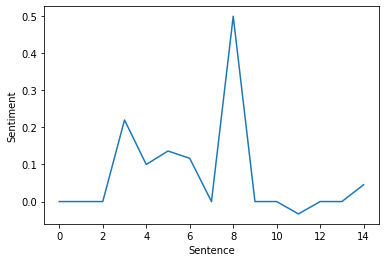

In [355]:
plt.plot(y);
plt.ylabel('Sentiment')
plt.xlabel('Sentence')

plt.show()

In [356]:
ma = pd.DataFrame(y)

In [357]:
ma['MA'] = ma.rolling(window=5).mean()

In [358]:
ma['MA']

0          NaN
1          NaN
2          NaN
3          NaN
4     0.064000
5     0.091273
6     0.114606
7     0.114606
8     0.170606
9     0.150606
10    0.123333
11    0.093333
12    0.093333
13   -0.006667
14    0.002424
Name: MA, dtype: float64

In [369]:
ma

,0,MA
0,0.000000,NaN
1,0.000000,NaN
2,0.000000,NaN
3,0.220000,NaN
4,0.100000,0.064000
5,0.136364,0.091273
6,0.116667,0.114606
7,0.000000,0.114606
8,0.500000,0.170606
9,0.000000,0.150606


###Moving Average

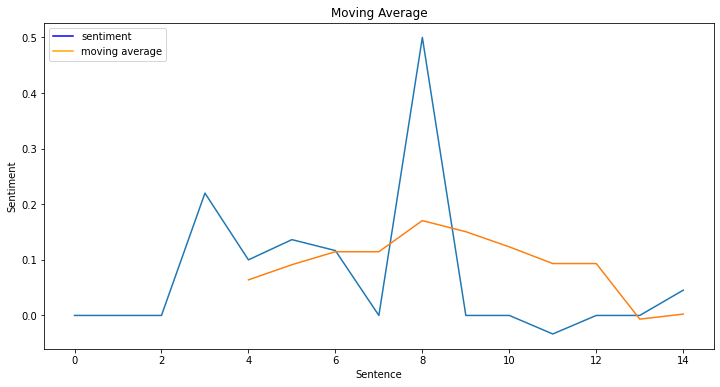

In [390]:
plt.figure(figsize=(12,6));

plt.plot(ma);
plt.ylabel('Sentiment')
plt.xlabel('Sentence')
plt.title('Moving Average')
plt.plot(0, "-b", label="sentiment")
plt.plot(0,"orange", label="moving average")
plt.plot()
plt.legend(loc="upper left")

plt.show()

This shows a variation in the change of sentiment with the moving average. For an example, Charles Jones (19044), we see 3 times the moving average crosses the change in sentiment. This might infer that there are 3 authors for the wikipedia article, each with their own sentiment. This will be different depending on the input.

###Summary

In [360]:
summary = wikipedia.summary(name, sentences = 6)  

In [361]:
summary

'Roger Kamien (born 1934) is a retired professor emeritus of musicology in the Hebrew University of Jerusalem, Israel. He was born in Paris, and was raised in America. He is the author of the book Music: An Appreciation, which is intended to show students the basics and the importance of music. It is considered essentially a textbook because its use mostly in colleges (and sometimes in high schools). It is published by McGraw-Hill and provides learners with information on how to understand classical and modern music.\nKamien taught at Queens College, New York.'

##Conclusions

- With vector analysis and k nearest neighbors we can find people that are similar to the target.
-With TextBlob we can see the sentiment, good or bad, subjective or objective.
-We can use these tools to gain further insight into the content of the subject.
